<a href="https://colab.research.google.com/github/AylinNaebzadeh/Complex-Dynamic-Network/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Directed** graph (each unordered pair of nodes is saved once): roadNet-CA.txt 
California road network

**Nodes**: 1965206

**Edges**: 5533214

https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python

In [27]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from itertools import chain
from collections import Counter
from operator import itemgetter
import pickle
import json

In [30]:
G = nx.read_edgelist("roadNet-CA.txt", nodetype=int, create_using=nx.DiGraph(), comments='#')
number_of_nodes = G.number_of_nodes()
number_of_edges = G.number_of_edges()
print(f"The number of nodes in the graph network is: {number_of_nodes}")
print(f"The number of edges in the graph network is: {number_of_edges}")

The number of nodes in the graph network is: 1073211
The number of edges in the graph network is: 3021540


In [ ]:
plt.figure(figsize =(12, 8))
nx.draw_networkx(G, with_labels = True)

In [ ]:
degrees = G.degree()
degree_values = [v for k, v in degrees]
sum_of_edges = sum(degree_values)

# Calculating the average is just a matter of division by the number of nodes.
average_degree = sum_of_edges / float(number_of_nodes)
print(f"The average degree in the graph network is: {average_degree}")

# For Directed Graphs I think is better to calculate both In-degree and Out-degree values.
avg_in_degree_value = sum(d for n, d in G.in_degree()) / float(number_of_nodes)
print(f"The average in degree in the graph network is: {avg_in_degree_value}")

avg_out_degree_value = sum(d for n, d in G.out_degree()) / float(number_of_nodes)
print(f"The average out degree in the graph network is: {avg_out_degree_value}")


The average degree in the graph network is: 5.631179632058929
The average in degree in the graph network is: 2.8155898160294646
The average out degree in the graph network is: 2.8155898160294646


In [ ]:
graph_density = nx.density(G)
print(f"The density of the graph network is: {graph_density}")

The density of the graph network is: 1.4327206657979522e-06


In [ ]:
"""
  Transitiity is a global metric for the network.

      Σ(triangles centered at node i)
  C = ----------------------------------
      Σ(triples centered at node i)
"""
graph_transitivity = nx.transitivity(G)
print(f"The transitivity of the graph network is: {graph_transitivity}")

# count_each_node_triangles = nx.triangles(G) → NetworkXNotImplemented: not implemented for directed type
# print(f"The number of triangles all of the nodes in the graph network are: ", count_each_node_triangles)

The transitivity of the graph network is: 0.06038741703627468


In [ ]:
"""
          triangles centered at node i           1
  C(i) = -------------------------------,  C = ----- Σ(i)C(i)
          triples centered at node i             N
        
"""
average_clustering = nx.average_clustering(G)
print(f"The average clustering value of the graph network is: {average_clustering}")

The average clustering value of the graph network is: 0.046370270074755485


In [ ]:
"""
  This block takes a lot of time to execute.
  You cannot compute diameter for either 
    1) a weakly-connected directed graph or 
    2) a disconnected graph, but you might use the maximal shortest path like so:
    https://stackoverflow.com/a/69636529/20285050
"""
# network_diameter = nx.diameter(G) → NetworkXError: Found infinite path length because the digraph is not strongly connected
# print(f"The diameter of the graph network is: {network_diameter}")

network_diameter = max([max(j.values()) for (i,j) in nx.shortest_path_length(G)])
print(f"The diameter in the graph network is: {network_diameter}")




In [ ]:
"""
  This block takes a lot of time to execute.
"""
# for g in nx.connected_components(G): → NetworkXNotImplemented: not implemented for directed type
#     print(nx.average_shortest_path_length(g))
path_lengths = (y.values() for (x, y) in nx.shortest_path_length(G))
average_shortest_path_length = statistics.mean(chain.from_iterable(path_lengths))
print(f"The average shortest path length of the graph network is: {average_shortest_path_length}")

In [ ]:
U = G.to_undirected()
# average_shortest_path_length = nx.average_shortest_path_length(U) NetworkXError: Graph is not connected.
components = [p for p in nx.connected_components(U)
              if len(p) >= 20
              or U.subgraph(p).number_of_edges() >= 20]
for c in components:
    subgraph = U.subgraph(c)
    average_shortest_path_length = nx.average_shortest_path_length(subgraph)
    print(f"The average shortest path length of the undirected graph network is: {average_shortest_path_length}")


In [ ]:
# undirected_network_diameter = nx.diameter(U) → NetworkXError: Found infinite path length because the graph is not connected
# print(f"The diameter in the undirected graph network is: {undirected_network_diameter}")
# https://stackoverflow.com/a/70543085/20285050
U = G.to_undirected()
components = [p for p in nx.connected_components(U)
              if len(p) >= 20
              or U.subgraph(p).number_of_edges() >= 20]
for c in components:
    subgraph = U.subgraph(c)
    diameter = nx.approximation.diameter(subgraph)
    print(diameter)

852
12
4
27
38
17
11
5
5
5
4
4
21
44
14
15


In [ ]:
def degree_histogram_directed(G, in_degree=False, out_degree=False):
    """
    Return a list of the frequency of each degree value.

    Parameters
    ----------
    G : Networkx graph
       A graph
    in_degree : bool
    out_degree : bool

    Returns
    -------
    hist : list
       A list of frequencies of degrees.
       The degree values are the index in the list.

    Notes
    -----
    Note: the bins are width one, hence len(list) can be large
    (Order(number_of_edges))
    """
    nodes = G.nodes()
    if in_degree:
        in_degree = dict(G.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(G.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in G.degree()]
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq

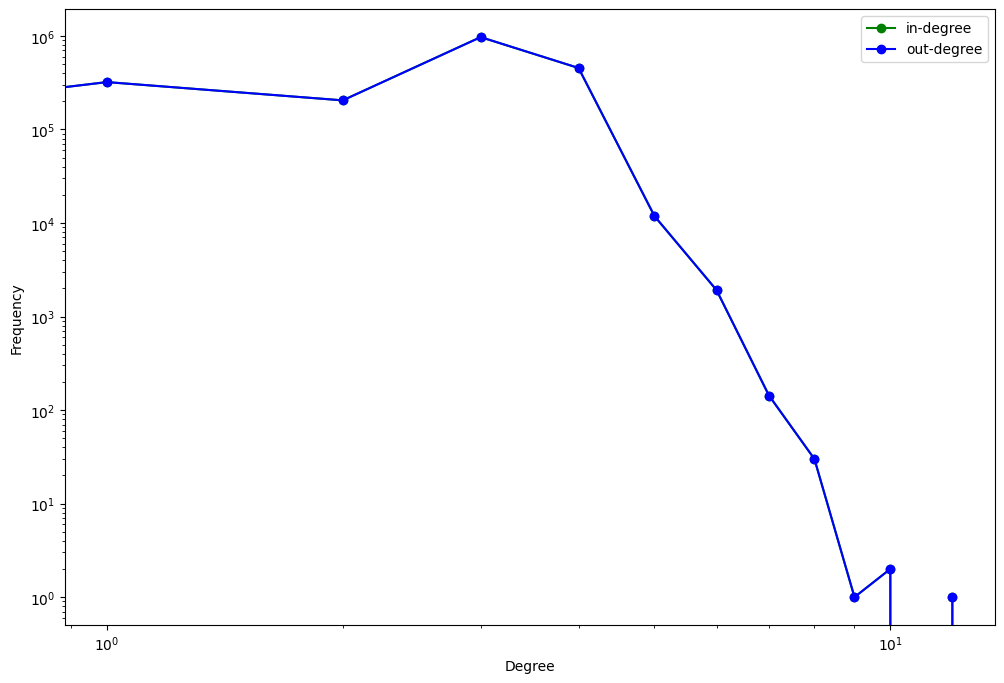

In [ ]:
# The in-degere and out-degree distribution are similar to each other, so they overlap with each other.
# https://stackoverflow.com/a/62662992/20285050
in_degree_freq = degree_histogram_directed(G, in_degree=True)
out_degree_freq = degree_histogram_directed(G, out_degree=True)
degrees = range(len(in_degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree') 
plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend(loc="upper right")

In [ ]:
# approximate_diameter = nx.approximation.diameter(G) → NetworkXError: DiGraph not strongly connected.

In [ ]:
r = nx.degree_pearson_correlation_coefficient(G)
print(f"The assortiativity value in the graph network is: {r}")

The assortiativity value in the graph network is: 0.11851235104125124


In [ ]:
deg_centrality = nx.degree_centrality(G)
deg_centrality_dict = {}
# print(deg_centrality) → output limit exceeded

with open("degree_centrality_data.txt", "w") as fp:
    json.dump(deg_centrality, fp)  # encode dict into JSON
    print(" **************** WRITE THE DEGREE CENTRALITY RESULTS INTO A FILE **************** ")

with open("degree_centrality_data.txt", "r") as fp:
    # Load the dictionary from the file
    deg_centrality_dict = json.load(fp)
    print(" **************** LOAD THE DEGREE CENTRALITY RESULTS FROM A FILE **************** ")

c = Counter(deg_centrality_dict)
top_5_nodes_based_on_degree_centrality = c.most_common(5)
print(f"The top five nodes with highest values in degree centrality measurment are: {top_5_nodes_based_on_degree_centrality}")

**************** WRITE THE DEGREE CENTRALITY RESULTS INTO A FILE **************** 
**************** LOAD THE DEGREE CENTRALITY RESULTS FROM A FILE **************** 
The top five nodes with highest values in degree centrality measurment are: [('5657', 3.852636648206116e-05), ('5727', 3.852636648206116e-05), ('6356', 3.852636648206116e-05), ('290162', 3.852636648206116e-05), ('291797', 3.852636648206116e-05)]


In [ ]:
close_centrality = nx.closeness_centrality(G)
closeness_centrality_dict = {}


with open("closeness_centrality_data.txt", "w") as fp:
    json.dump(close_centrality, fp)  # encode dict into JSON
    print(" **************** WRITE THE CLOSENESS CENTRALITY RESULTS INTO A FILE **************** ")

with open("closeness_centrality_data.txt", "r") as fp:
    # Load the dictionary from the file
    closeness_centrality_dict = json.load(fp)
    print(" **************** LOAD THE CLOSENESS CENTRALITY RESULTS FROM A FILE **************** ")

c = Counter(closeness_centrality_dict)
top_5_nodes_based_on_closeness_centrality = c.most_common(5)
print(f"The top five nodes with highest values in closeness centrality measurment are: {top_5_nodes_based_on_closeness_centrality}")

In [ ]:
bet_centrality = nx.betweenness_centrality(G, normalized = True, 
                                              endpoints = False)
betweenness_centrality_dict = {}
# parameters normalized
# and endpoints ensure whether we normalize the value
# and consider the endpoints respectively.

with open("betweenness_centrality_data.txt", "w") as fp:
    json.dump(bet_centrality, fp)  # encode dict into JSON
    print(" **************** WRITE THE BETWEENNESS CENTRALITY RESULTS INTO A FILE **************** ")

with open("betweenness_centrality_data.txt", "r") as fp:
    # Load the dictionary from the file
    betweenness_centrality_dict = json.load(fp)
    print(" **************** LOAD THE BETWEENNESS CENTRALITY RESULTS FROM A FILE **************** ")

c = Counter(betweenness_centrality_dict)
top_5_nodes_based_on_bet_centrality = c.most_common(5)
print(f"The top five nodes with highest values in betweenness centrality measurment are: {top_5_nodes_based_on_bet_centrality}")

In [ ]:
# https://stackoverflow.com/a/56708233/20285050

eigenvector_centrality = nx.eigenvector_centrality_numpy(G)
eigenvector_centrality_dict = {}


with open("eigenvector_centrality_data.txt", "w") as fp:
    json.dump(eigenvector_centrality, fp)  # encode dict into JSON

with open("eigenvector_centrality_data.txt", "r") as fp:
    # Load the dictionary from the file
    eigenvector_centrality_dict = json.load(fp)

c = Counter(eigenvector_centrality_dict)
top_5_nodes_based_on_ev_centrality = c.most_common(5)
print(f"The top five nodes with highest values in eigenvector centrality measurment are: {top_5_nodes_based_on_ev_centrality}")

The top five nodes with highest values in eigenvector centrality measurment are: [('6460', 0.26516156567236626), ('6385', 0.24862223663663022), ('6478', 0.2209269741713158), ('6356', 0.21865406026449855), ('6483', 0.19919724592919408)]


In [24]:
pr_centrality = nx.pagerank(G, alpha = 0.8)
pr_centrality_dict = {}


with open("page_rank_centrality_data.txt", "w") as fp:
    json.dump(pr_centrality, fp)  # encode dict into JSON

with open("page_rank_centrality_data.txt", "r") as fp:
    # Load the dictionary from the file
    pr_centrality_dict = json.load(fp)

c = Counter(pr_centrality_dict)
top_5_nodes_based_on_pr_centrality = c.most_common(5)
print(f"The top five nodes with highest values in page rank centrality measurment are: {top_5_nodes_based_on_pr_centrality}")

The top five nodes with highest values in page rank centrality measurment are: [('225438', 1.1096675350427171e-05), ('287362', 1.077562306947111e-05), ('241926', 9.812466226602925e-06), ('241299', 8.849309383734741e-06), ('264566', 8.849309383734741e-06)]


In [26]:
N = G.order()
sum_in_degrees = sum(d for n, d in G.in_degree())
max_in = max(d for n, d in G.in_degree())
centralization = float(N * max_in - sum_in_degrees) / (N - 1) ** 2
print(f"The in degree centralization value of the graph network is: {centralization}")

The in degree centralization value of the graph network is: 1.2539784961323756e-05
